This allows me to get coorindates by clicking 

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load satellite imagery
#image_path = "C:\\Users\\Student\\Documents\\101_walrus_mres\\planet_skysat_pairs\\planet_skysat_pairs\\buchholzbukta_psscene_analytic_8b_sr_udm2\\PSScene\\20230714_104853_14_24a1_3B_AnalyticMS_SR_8b_harmonized_clip.tif"

image_path = "C:\\Users\\Student\\Documents\\101_walrus_mres\\planet_skysat_pairs\\planet_skysat_pairs\\torellneset_skysatscene_pansharpened_udm2\\SkySatScene\\20230825_104320_ssc13d3_0006_pansharpened_clip.tif"
dataset = rasterio.open(image_path)

In [3]:
# Make it interactive                                                                   # This can cause massive issues with plots
%matplotlib notebook

# Open the image
with rasterio.open(image_path) as dataset:
    # Read the image bands
    image = dataset.read()

# Create a false-color RGB composite using bands 4, 3, and 2 (indices are 3, 2, and 1 in Python)
rgb_image = image[[3, 2, 1], :, :].transpose(1, 2, 0)

# Normalise pixel values to the range [0, 1]
rgb_image = rgb_image.astype(np.float32)
rgb_image /= rgb_image.max()

# Plot the RGB image
plt.imshow(rgb_image)
plt.title('Select a pixel by clicking')
plt.xlabel('X')
plt.ylabel('Y')

# Handle mouse click events
def onclick(event):
    x, y = int(event.xdata + 0.5), int(event.ydata + 0.5)                            # Get coordinates of the clicked pixel
    print(f"Selected pixel coordinates: ({x}, {y})")

# Connect onclick function to handle mouse clicks
plt.gcf().canvas.mpl_connect('button_press_event', onclick)
plt.show()

<IPython.core.display.Javascript object>

This is the play around part where im trying to work out regions of interest 

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import PolygonSelector
from matplotlib.patches import Polygon

In [4]:
# Load the image using rasterio
with rasterio.open('C:\\Users\\Student\\Documents\\101_walrus_mres\\planet_skysat_pairs\\planet_skysat_pairs\\torellneset_skysatscene_pansharpened_udm2\\SkySatScene\\20230825_104320_ssc13d3_0006_pansharpened_clip.tif') as src:
    image = src.read()

# Convert the image to numpy array
image = np.moveaxis(image, 0, -1)  # Move the band axis to the last dimension

# Make it interactive
%matplotlib notebook

In [5]:
# Display the image
plt.imshow(image[:, :, [3, 2, 1]])  # Display only RGB channels (bands 4, 3, 2)
plt.title('Select ROI by drawing a polygon')

# List to store ROI coordinates
roi_coords = []

# Function to handle polygon selection
def onselect(verts):
    global roi_coords
    roi_coords = verts
    poly = Polygon(verts, edgecolor='r', linewidth=2, alpha=0.5, fill=False)
    plt.gca().add_patch(poly)
    plt.draw()

# Create polygon selector
selector = PolygonSelector(plt.gca(), onselect)

plt.show()

<IPython.core.display.Javascript object>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [6]:
# Once the polygon is drawn, you can access the ROI coordinates in the variable 'roi_coords'
print("ROI coordinates:", roi_coords)

ROI coordinates: [(2840.3798701220608, 1241.3428758190516), (2827.2776497617756, 1259.0308733054362), (2808.2794302393627, 1266.237094503593), (2826.6225387437617, 1275.4086487557925), (2845.6207582661746, 1271.477982647707)]


In [8]:
# Convert the polygon coordinates to integers
x, y = np.round(np.array(roi_coords)).astype(int).T

# Define the bounding box of the polygon
xmin, xmax = np.min(x), np.max(x)
ymin, ymax = np.min(y), np.max(y)

# Create a mask for the selected area
mask = np.zeros_like(image[:, :, 0], dtype=bool)
mask[y, x] = True

# Extract the spectral profile of the selected area
spectral_profile = image[ymin:ymax, xmin:xmax, :]

# Plot the spectral profile
plt.figure()
plt.plot(np.mean(spectral_profile, axis=(0, 1)))
plt.title('Spectral Profile of Selected Area')
plt.xlabel('Band')
plt.ylabel('Mean Pixel Value')
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>

debug bug bug

<IPython.core.display.Javascript object>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [12]:
# List to store ROI coordinates
roi_coords = []

# Function to handle polygon selection
def onselect(verts):
    global roi_coords
    roi_coords = verts
    poly = Polygon(verts, edgecolor='r', linewidth=2, alpha=0.5, fill=False)
    ax.add_patch(poly)
    fig.canvas.draw_idle()

# Create polygon selector
selector = PolygonSelector(ax, onselect) 

In [13]:
plt.show()

# Once the polygon is drawn, you can access the ROI coordinates in the variable 'roi_coords'
print("ROI coordinates:", roi_coords)


ROI coordinates: []


de bug bug bug 

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Load the image using rasterio
with rasterio.open('C:\\Users\\Student\\Documents\\101_walrus_mres\\planet_skysat_pairs\\planet_skysat_pairs\\torellneset_skysatscene_pansharpened_udm2\\SkySatScene\\20230825_104320_ssc13d3_0006_pansharpened_clip.tif') as src:
    image = src.read()
    
# Create a false-color RGB composite using bands 4, 3, and 2 (indices are 3, 2, and 1 in Python)
rgb_image = image[[3, 2, 1], :, :].transpose(1, 2, 0)    

# Convert the image to numpy array
image = np.moveaxis(image, 0, -1)  # Move the band axis to the last dimension

# Make it interactive
%matplotlib notebook

# Display the image
plt.imshow(image)
plt.title('Select ROI by clicking and dragging')
plt.axis('on')

# List to store ROI coordinates
roi_coords = []

# Function to handle mouse click events
def onclick(event):
    if event.button == 1:                          # Left mouse button
        roi_coords.append((int(event.xdata), int(event.ydata)))
    elif event.button == 3:                        # Right mouse button
        if len(roi_coords) == 2:
            min_x = min(roi_coords[0][0], roi_coords[1][0])
            max_x = max(roi_coords[0][0], roi_coords[1][0])
            min_y = min(roi_coords[0][1], roi_coords[1][1])
            max_y = max(roi_coords[0][1], roi_coords[1][1])

            # Extract the region of interest from the image
            roi = image[min_y:max_y, min_x:max_x]

            # Display the region of interest
            plt.figure()
            plt.imshow(roi)
            plt.title('Region of Interest')
            plt.axis('on')
            plt.show()

# Connect the mouse click event to the onclick function
cid = plt.gcf().canvas.mpl_connect('button_press_event', onclick)

plt.show()

<IPython.core.display.Javascript object>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [4]:
# Create a false-color RGB composite using bands 4, 3, and 2 (indices are 3, 2, and 1 in Python)
rgb_image = image[[3, 2, 1], :, :].transpose(1, 2, 0)    

# Convert the image to numpy array
image = np.moveaxis(image, 0, -1)  # Move the band axis to the last dimension

# Make it interactive
%matplotlib notebook

# Display the image
plt.imshow(image)
plt.title('Select ROI by clicking and dragging')
plt.axis('on')

# List to store ROI coordinates
roi_coords = []

# Function to handle mouse click events
def onclick(event):
    if event.inaxes == plt.gca():  # Check if the mouse click occurred within the image plot
        if event.button == 1:      # Left mouse button
            roi_coords.append((int(event.xdata), int(event.ydata)))
        elif event.button == 3:    # Right mouse button
            if len(roi_coords) == 2:
                min_x = min(roi_coords[0][0], roi_coords[1][0])
                max_x = max(roi_coords[0][0], roi_coords[1][0])
                min_y = min(roi_coords[0][1], roi_coords[1][1])
                max_y = max(roi_coords[0][1], roi_coords[1][1])

                # Extract the region of interest from the image
                roi = image[min_y:max_y, min_x:max_x]

                # Display the region of interest
                plt.figure()
                plt.imshow(roi)
                plt.title('Region of Interest')
                plt.axis('on')
                plt.show()

# Connect the mouse click event to the onclick function
cid = plt.gcf().canvas.mpl_connect('button_press_event', onclick)

plt.show()

TypeError: Invalid shape (4, 4170, 4410) for image data

In [5]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image using rasterio
with rasterio.open('C:\\Users\\Student\\Documents\\101_walrus_mres\\planet_skysat_pairs\\planet_skysat_pairs\\torellneset_skysatscene_pansharpened_udm2\\SkySatScene\\20230825_104320_ssc13d3_0006_pansharpened_clip.tif') as src:
    image = src.read()

# Convert the image to numpy array
image = np.moveaxis(image, 0, -1)  # Move the band axis to the last dimension

# Make it interactive
%matplotlib notebook

# Display the image
plt.imshow(image[:, :, [3, 2, 1]])  # Display only RGB channels (bands 4, 3, 2)
plt.title('Select ROI by clicking and dragging')
plt.axis('on')

# List to store ROI coordinates
roi_coords = []

# Function to handle mouse click events
def onclick(event):
    if event.inaxes == plt.gca():  # Check if the mouse click occurred within the image plot
        if event.button == 1:      # Left mouse button
            roi_coords.append((int(event.xdata), int(event.ydata)))
        elif event.button == 3:    # Right mouse button
            if len(roi_coords) == 2:
                min_x = min(roi_coords[0][0], roi_coords[1][0])
                max_x = max(roi_coords[0][0], roi_coords[1][0])
                min_y = min(roi_coords[0][1], roi_coords[1][1])
                max_y = max(roi_coords[0][1], roi_coords[1][1])

                # Extract the region of interest from the image
                roi = image[min_y:max_y, min_x:max_x]

                # Display the region of interest
                plt.figure()
                plt.imshow(roi)
                plt.title('Region of Interest')
                plt.axis('on')
                plt.show()

# Connect the mouse click event to the onclick function
cid = plt.gcf().canvas.mpl_connect('button_press_event', onclick)

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pixels gathered from inteactive pop up 

In [4]:
# Select pixels 
selected_pixels = [(2820.5, 1265.7)] 

In [5]:
# Open the image
with rasterio.open(image_path) as dataset:
    # Extract spectral signatures
    spectral_signatures = []
    for pixel in selected_pixels:
        values = []
        for band in range(dataset.count):  # Loop through each band
            value = dataset.read(band + 1, window=((pixel[0], pixel[0]+1), (pixel[1], pixel[1]+1)))
            values.append(value[0][0])  # Assuming single pixel extraction
        spectral_signatures.append(values)

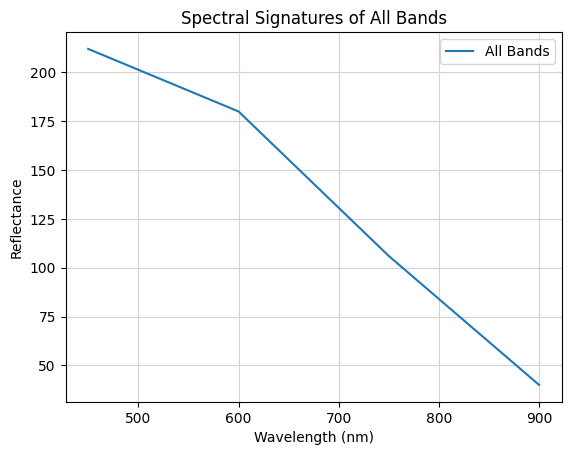

In [36]:
# Concatenate all band values into a single array
all_band_values = np.concatenate(spectral_signatures)

# Collect all wavelengths
all_wavelengths = []
for min_wavelength, max_wavelength in band_wavelengths.values():
    wavelengths = np.linspace(min_wavelength, max_wavelength, len(spectral_signatures[0]))
    all_wavelengths.extend(wavelengths)

# Determine the min and max wavelengths
min_wavelength = min(all_wavelengths)
max_wavelength = max(all_wavelengths)

# Create a corresponding wavelength range
wavelength_range = np.linspace(min_wavelength, max_wavelength, len(all_band_values))

# Plot all bands as a single line
plt.plot(wavelength_range, all_band_values, label='All Bands')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures of All Bands')
plt.legend()
# Set grid color to light grey
plt.grid(color='lightgrey')
plt.grid(True)
plt.show()

Plot above cant be right 

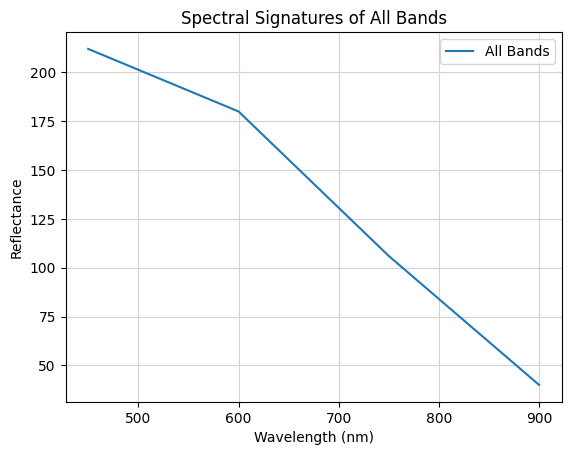

In [40]:
# Create new figure
fig, ax = plt.subplots()

# Plot all bands as a single line
ax.plot(wavelength_range, all_band_values, label='All Bands')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance')
ax.set_title('Spectral Signatures of All Bands')
ax.legend()

# Set the background color of the plot area to white                   # Why this no work
ax.patch.set_facecolor('white')

# Set grid color to light grey
ax.grid(color='lightgrey')

plt.show()

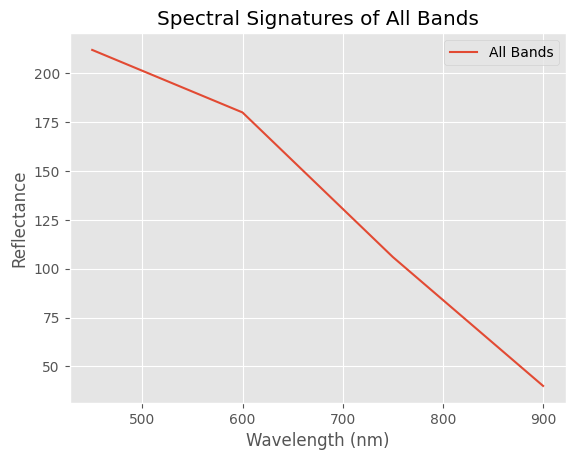

In [45]:
# Set the style sheet
plt.style.use('ggplot')

# All band values into a single array
all_band_values = np.concatenate(spectral_signatures)

# Collect all wavelengths
all_wavelengths = []
for min_wavelength, max_wavelength in band_wavelengths.values():
    wavelengths = np.linspace(min_wavelength, max_wavelength, len(spectral_signatures[0]))
    all_wavelengths.extend(wavelengths)

# Determine the min and max wavelengths
min_wavelength = min(all_wavelengths)
max_wavelength = max(all_wavelengths)

# Create a corresponding wavelength range
wavelength_range = np.linspace(min_wavelength, max_wavelength, len(all_band_values))

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot all bands as a single line
ax.plot(wavelength_range, all_band_values, label='All Bands')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance')
ax.set_title('Spectral Signatures of All Bands')
ax.legend()

plt.show()

ValueError: x and y must have same first dimension, but have shapes (16,) and (4,)

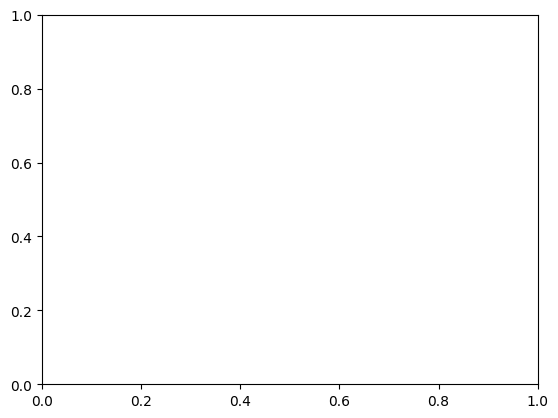

In [31]:
# Concatenate all band values into a single array
all_band_values = np.concatenate(spectral_signatures)

# Create a corresponding wavelength range
wavelength_range = []
for band_name, (min_wavelength, max_wavelength) in band_wavelengths.items():
    wavelengths = np.linspace(min_wavelength, max_wavelength, len(spectral_signatures[0]))
    wavelength_range.extend(wavelengths)

# Plot all bands as a single line
plt.plot(wavelength_range, all_band_values, label='All Bands')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures of All Bands')
plt.legend()
plt.grid(True)
plt.show()

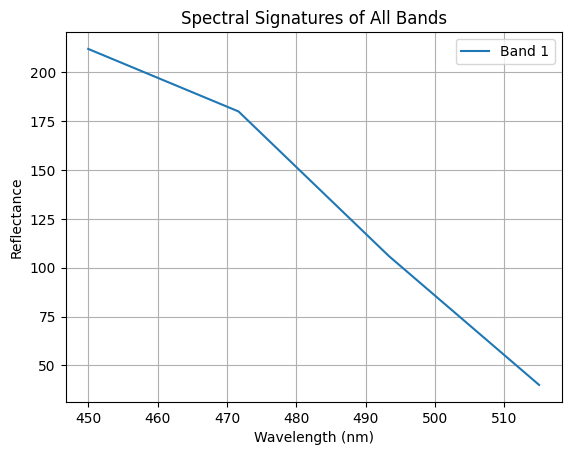

In [30]:
# Plot the spectral signatures of all bands on one graph
plt.figure()

# Plot the spectral signature of each band
for i, band_values in enumerate(spectral_signatures):
    band_name = f'Band {i+1}'
    min_wavelength, max_wavelength = band_wavelengths.get(band_name, (None, None))
    if min_wavelength is not None and max_wavelength is not None:
        wavelengths = np.linspace(min_wavelength, max_wavelength, len(band_values))
        plt.plot(wavelengths, band_values, label=band_name)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures of All Bands')
plt.legend()
plt.grid(True)
plt.show()

de bug bug 

In [24]:
# Plot the spectral signature of the selected pixel
band_wavelengths = {
    'Band 1': (450, 515),
    'Band 2': (515, 595),
    'Band 3': (605, 695),
    'Band 4': (740, 900)
}

plt.ioff()  # Turn off interactive mode
plt.figure()
for i, band_values in enumerate(spectral_signatures):
    band_name = f'Band {i+1}'
    if band_name in band_wavelengths:  # Check if the band_name exists in band_wavelengths
        min_wavelength, max_wavelength = band_wavelengths[band_name]
        # Plot with approximate wavelengths
        wavelengths = np.linspace(min_wavelength, max_wavelength, len(band_values))
        plt.plot(wavelengths, band_values, label=band_name)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectral Signature of Selected Pixel')
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

bug

In [8]:
# Define approximate wavelengths for each band
band_wavelengths = {
    'Blue': (450, 515),
    'Green': (515, 595),
    'Red': (605, 695),
    'NIR': (740, 900)
}

In [14]:
# Open the raster image
with rasterio.open(image_path) as dataset:
    # Extract spectral signatures
    spectral_signatures = []
    for pixel in selected_pixels:
        values = []
        for band in range(dataset.count):
            # Read pixel value
            value = dataset.read(band + 1, window=((pixel[0], pixel[0] + 1), (pixel[1], pixel[1] + 1)))
            values.append(value[0][0])  # Assuming single pixel extraction
        spectral_signatures.append(values)

    # Plot the spectral signature of the selected pixel
    plt.figure()
    for i, band_values in enumerate(spectral_signatures):
        band_name = f'Band {i+1}'
        if i < len(band_wavelengths):
            min_wavelength, max_wavelength = band_wavelengths[band_name]
            # Plot with approximate wavelengths
            wavelengths = np.linspace(min_wavelength, max_wavelength, len(band_values))
            plt.plot(wavelengths, band_values, label=band_name)

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance')
    plt.title('Spectral Signature of Selected Pixel')
    plt.legend()
    plt.grid(True)
    plt.show()

<IPython.core.display.Javascript object>

KeyError: 'Band 1'

buuuuuuug

In [7]:
# Determine the number of bands from the dataset
num_bands = len(spectral_signatures[0])  # Assuming all spectral signatures have the same length

# Assuming you have wavelengths for each band, you can define them here
# If you don't have wavelengths information, you can use band indices instead
# For example: wavelengths = range(1, num_bands + 1)
wavelengths = [f'Band {i+1}' for i in range(num_bands)]

# Plot the spectral signature of the pixel
plt.figure()
for i, band_values in enumerate(spectral_signatures):
    plt.plot(wavelengths, band_values, label=f'Pixel {i+1}')

plt.xlabel('Band')
plt.ylabel('Reflectance')
plt.title('Spectral Signature of Pixels')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

<IPython.core.display.Javascript object>

In [6]:
# Plot spectral signatures
bands = [f"Band {i+1}" for i in range(dataset.count)]
for i, pixel in enumerate(selected_pixels):
    plt.plot(bands, spectral_signatures[i], label=f"Pixel {pixel}")
plt.xlabel('Band')
plt.ylabel('Reflectance/Intensity')
plt.title('Spectral Signatures of Selected Pixels')
plt.legend()
plt.show()

buggy buggy bug bug

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define image path
image_path = "C:\\Users\\Student\\Documents\\101_walrus_mres\\planet_skysat_pairs\\planet_skysat_pairs\\torellneset_skysatscene_pansharpened_udm2\\SkySatScene\\20230825_104320_ssc13d3_0006_pansharpened_clip.tif"

In [17]:
# Open the raster image
with rasterio.open(image_path) as dataset:
    # Read the image bands
    image = dataset.read()

In [18]:
# Make it interactive
%matplotlib notebook

In [19]:
# Create a false-color RGB composite using bands 4, 3, and 2 (indices are 3, 2, and 1 in Python)
rgb_image = image[[3, 2, 1], :, :].transpose(1, 2, 0)

# Normalise pixel values to the range [0, 1]
rgb_image = rgb_image.astype(np.float32)
rgb_image /= rgb_image.max()

# Plot the RGB image
plt.imshow(rgb_image)
plt.title('Select a pixel by clicking')
plt.xlabel('X')
plt.ylabel('Y')

# Handle mouse click events
selected_pixels = []
def onclick(event):
    x, y = int(event.xdata + 0.5), int(event.ydata + 0.5)  # Get coordinates of the clicked pixel
    selected_pixels.append((x, y))  # Append the selected pixel coordinates
    print(f"Selected pixel coordinates: ({x}, {y})")

# Connect onclick function to handle mouse clicks
plt.gcf().canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [20]:

# Plot the spectral signature of the selected pixel
band_wavelengths = {
    'Blue': (450, 515),
    'Green': (515, 595),
    'Red': (605, 695),
    'NIR': (740, 900)
}

# Extract spectral signatures
spectral_signatures = []
with rasterio.open(image_path) as dataset:
    for pixel in selected_pixels:
        values = []
        for band in range(dataset.count):
            # Read pixel value
            value = dataset.read(band + 1, window=((pixel[0], pixel[0] + 1), (pixel[1], pixel[1] + 1)))
            values.append(value[0][0])  # Assuming single pixel extraction
        spectral_signatures.append(values)

# Plot the spectral signature of the selected pixel
plt.figure()
for i, band_values in enumerate(spectral_signatures):
    band_name = f'Band {i+1}'
    if i < len(band_wavelengths):
        min_wavelength, max_wavelength = band_wavelengths[band_name]
        # Plot with approximate wavelengths
        wavelengths = np.linspace(min_wavelength, max_wavelength, len(band_values))
        plt.plot(wavelengths, band_values, label=band_name)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectral Signature of Selected Pixel')
plt.legend()
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [21]:
# Select pixels 
selected_pixels = [(2820.5, 1265.7)] 

# Open the raster image
with rasterio.open(image_path) as dataset:
    # Extract spectral signatures
    spectral_signatures = []
    for pixel in selected_pixels:
        values = []
        for band in range(dataset.count):  # Loop through each band
            value = dataset.read(band + 1, window=((pixel[0], pixel[0]+1), (pixel[1], pixel[1]+1)))
            values.append(value[0][0])  # Assuming single pixel extraction
        spectral_signatures.append(values)

# Plot the spectral signature of the selected pixel
band_wavelengths = {
    'Blue': (450, 515),
    'Green': (515, 595),
    'Red': (605, 695),
    'NIR': (740, 900)
}

plt.figure()
for i, band_values in enumerate(spectral_signatures):
    band_name = f'Band {i+1}'
    if i < len(band_wavelengths):
        min_wavelength, max_wavelength = band_wavelengths[band_name]
        # Plot with approximate wavelengths
        wavelengths = np.linspace(min_wavelength, max_wavelength, len(band_values))
        plt.plot(wavelengths, band_values, label=band_name)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectral Signature of Selected Pixel')
plt.legend()
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>

KeyError: 'Band 1'

In [22]:

# Define image path
image_path = "C:\\Users\\Student\\Documents\\101_walrus_mres\\planet_skysat_pairs\\planet_skysat_pairs\\torellneset_skysatscene_pansharpened_udm2\\SkySatScene\\20230825_104320_ssc13d3_0006_pansharpened_clip.tif"

# Select pixels 
selected_pixels = [(2820.5, 1265.7)] 

# Open the raster image
with rasterio.open(image_path) as dataset:
    # Extract spectral signatures
    spectral_signatures = []
    for pixel in selected_pixels:
        values = []
        for band in range(dataset.count):  # Loop through each band
            value = dataset.read(band + 1, window=((pixel[0], pixel[0]+1), (pixel[1], pixel[1]+1)))
            values.append(value[0][0])  # Assuming single pixel extraction
        spectral_signatures.append(values)

# Plot the spectral signature of the selected pixel
band_wavelengths = {
    'Blue': (450, 515),
    'Green': (515, 595),
    'Red': (605, 695),
    'NIR': (740, 900)
}

plt.figure()
for i, band_values in enumerate(spectral_signatures):
    band_name = f'Band {i+1}'
    if i < len(band_wavelengths):
        min_wavelength, max_wavelength = band_wavelengths[band_name]
        # Plot with approximate wavelengths
        wavelengths = np.linspace(min_wavelength, max_wavelength, len(band_values))
        plt.plot(wavelengths, band_values, label=band_name)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectral Signature of Selected Pixel')
plt.legend()
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>

KeyError: 'Band 1'